## The Sparks Foundation - GRIP - Data Science And Business Analytics - FEB2021

### TASK 1: Prediction Using Supervised ML

### Author: Ashwika R. Ghumate

### Dataset used: Student Scores
 - Data can be downloaded through the following link -  http://bit.ly/w-data


### Problem Statement(s)
 - Predict the percentage of an student based on the no. of study hours.
 - What will be predicted score if a student studies for 9.25 hrs/ day? 

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Loading the dataset from the csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the distribution of scores

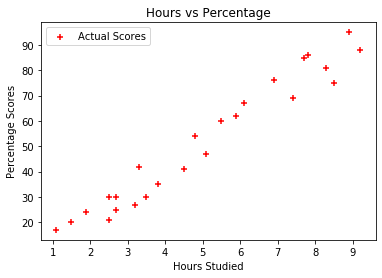

In [3]:
%matplotlib inline
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.title('Hours vs Percentage')
plt.scatter(df.Hours, df.Scores, color='red', marker='+', label='Actual Scores')
plt.legend()

#### From the graph above, it is clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data by dividing the dataset into attributes and targets.

In [4]:
X = df.iloc[:,:1].values
y = df.iloc[:,1].values

In [5]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the data into training and testing sets by using Scikit-Learn's built-in train_test_split() method

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the algorithm

In [7]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

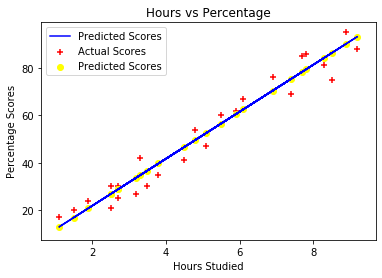

In [8]:
#Plotting the regression line
line = reg.coef_*X+reg.intercept_

#Plotting the test data
plt.scatter(X, y, color='red', marker='+', label='Actual Scores')
plt.plot(X, line, color='blue', label='Predicted Scores')
plt.scatter(X, line, color='yellow', label='Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.title('Hours vs Percentage')
plt.legend()

### Prediction Making

In [9]:
y_pred = reg.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
#Comparing actual scores and predicted scores
n_df = pd.DataFrame({'Actual Scores':y_test, 'Predicted Scores':y_pred})
n_df.head()

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#Predicted score if a student studies for 9.25 hrs/ day
hour = 9.25
pred = reg.predict([[9.25]])
print("No. of hours = {} ".format(hour))
print("Predicted Score = {} ".format(pred[0]))

No. of hours = 9.25 
Predicted Score = 93.69173248737538 


### Evaluating the performance of the algorithm

In [12]:
from sklearn import metrics
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error =  4.183859899002975
